`Goal of the Project`: In this project, we aim to develop a Social Media Sentiment Analysis system to assist organizations, including platforms like Facebook and Twitter. The objective is to understand and analyze user sentiments, enabling the organization to better serve users by providing the information or objects they are searching for.

<div style="text-align: center"><img src="https://storage.googleapis.com/kaggle-datasets-images/4245661/7316345/e6d20ba8f620d0f86db1715f2de3f540/dataset-card.png?t=2024-01-01-07-10-21" width="100%" heigh="100%" alt="Retrieve&Re-Rank pipeline"></div>

<div style="text-align: center"><img src="https://static.vecteezy.com/system/resources/thumbnails/003/600/947/small/set-of-social-media-icon-in-round-bakground-free-vector.jpg" width="100%" heigh="100%" alt="Retrieve&Re-Rank pipeline"></div>

In [1]:
# For analysis and cleaning 
import pandas as pd
import numpy as np
# For visualizaion
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
df.shape

(732, 15)

The dimension of this Pandas DataFrames is 732 rows and 15 columns.

In [4]:
# Drop column Unnamed: 0.1
df.drop(columns='Unnamed: 0.1',inplace=True)

In [5]:
# Rename column Unnamed: 0 to id
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [6]:
# Counting missing values in each column
df.isnull().sum()

Id           0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [7]:
# Displaying the data types of each column
df.dtypes

Id             int64
Text          object
Sentiment     object
Timestamp     object
User          object
Platform      object
Hashtags      object
Retweets     float64
Likes        float64
Country       object
Year           int64
Month          int64
Day            int64
Hour           int64
dtype: object

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

`df['Timestamp'] = pd.to_datetime(df['Timestamp'])`: Converts the 'Timestamp' column in the DataFrame df to a datetime format. This is useful when the 'Timestamp' column is initially stored as strings or another format, and you want to work with it as a datetime object.

`df['Day'] = df['Timestamp'].dt.day`: Creates a new column 'Day' in the DataFrame, extracting the day component from the 'Timestamp' column. The `.dt.day` attribute is used to access the day part of the datetime.

`df['Month'] = df['Timestamp'].dt.month`: Creates a new column 'Month' in the DataFrame, extracting the month component from the 'Timestamp' column. The `.dt.month` attribute is used to access the month part of the datetime.

`df['Year'] = df['Timestamp'].dt.year`: Creates a new column 'Year' in the DataFrame, extracting the year component from the 'Timestamp' column. The `.dt.year` attribute is used to access the year part of the datetime.

In [9]:
df['Text'] = df['Text'].str.strip()
df['Sentiment'] = df['Sentiment'].str.strip()
df['User'] = df['User'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Hashtags'] = df['Hashtags'].str.strip()
df['Country'] = df['Country'].str.strip()

**EDA**

In [10]:
df.head(1)

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12


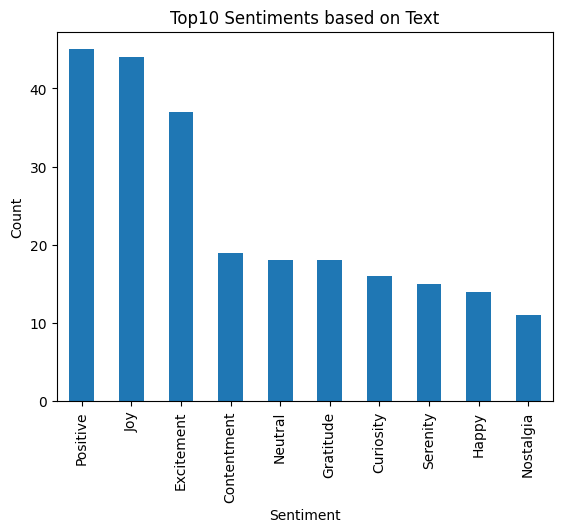

In [11]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [12]:
df['Platform'].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

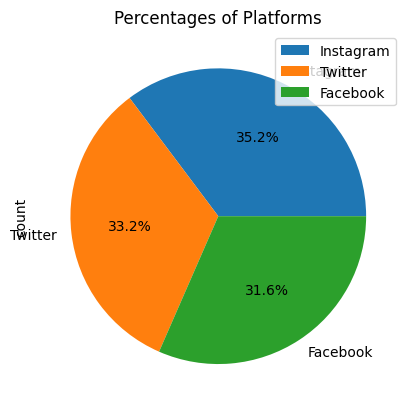

In [13]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

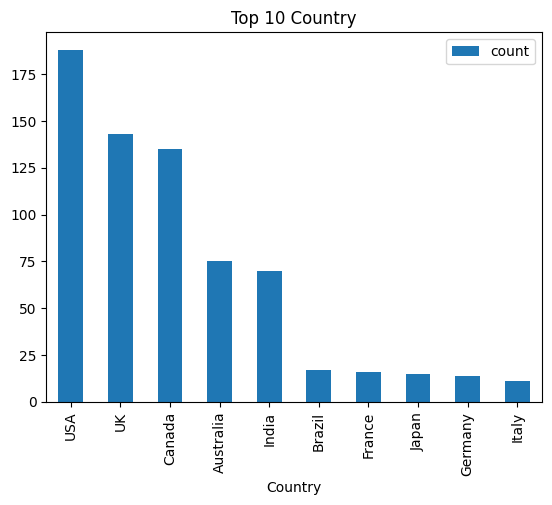

In [14]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Country')
plt.legend()
plt.show()

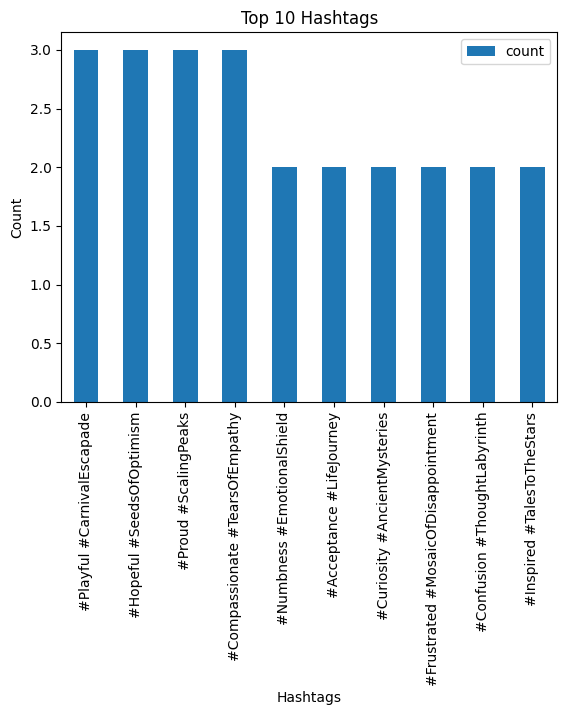

In [15]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

In [16]:
# Descrip data nurimucal
df.describe()

,Id,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,0.000000,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,212.428936,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [17]:
numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maxmum {col}: {df[col].max()}")

Minimum Day: 1 | Maxmum Day: 31
Minimum Month: 1 | Maxmum Month: 12
Minimum Year: 2010 | Maxmum Year: 2023
Minimum Likes: 10.0 | Maxmum Likes: 80.0
Minimum Retweets: 5.0 | Maxmum Retweets: 40.0


# Relationships between columns

**Q1: Top 10 hashtags reweeted**

**Answer**

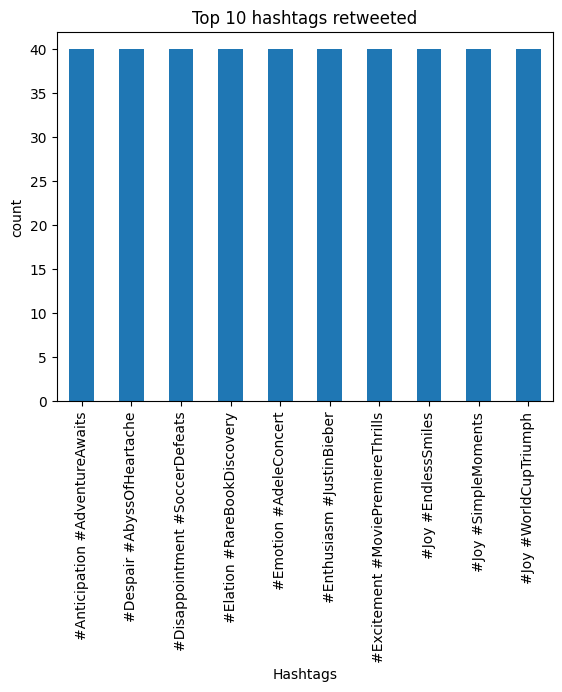

In [18]:
H_R = df.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 hashtags retweeted')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

**Q2: What is platform top liked by users?**

**Answer**

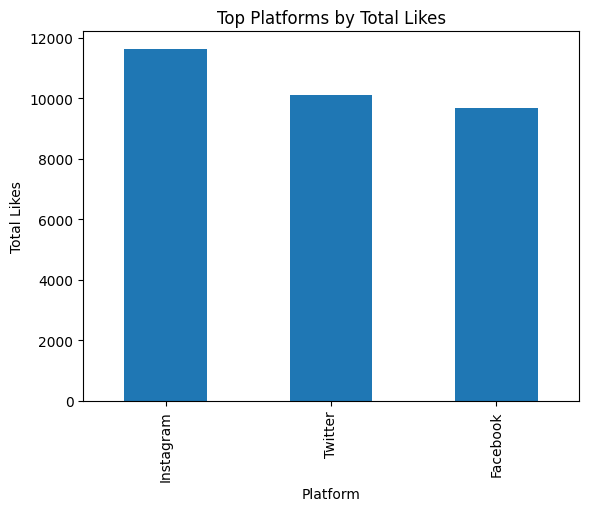

In [19]:
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

**Q3: What is the most country liked posts**

**Answer**

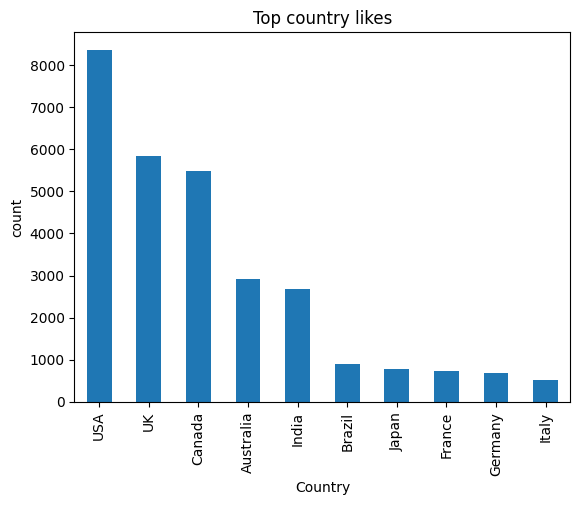

In [20]:
top_country_likes = df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Top country likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

Let's segment users for each platform.

In [21]:
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']
Instagram=df[df['Platform']=='Instagram']

# Facebook

**Top 10hashtags retweeted**

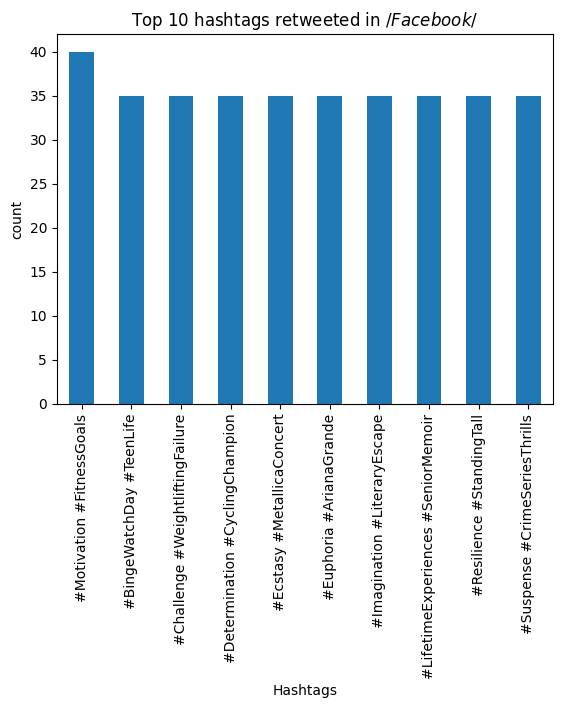

In [22]:
H_R_f=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Facebook $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

**Question: Who User liked mostly?**

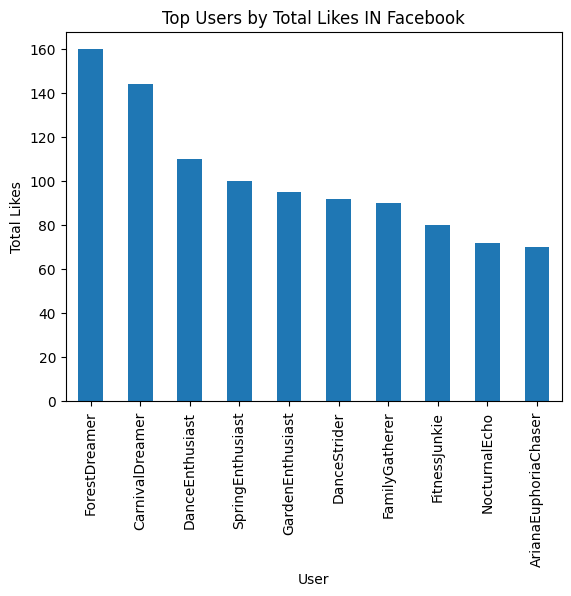

In [23]:
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_F.plot(kind='bar')
plt.title('Top Users by Total Likes IN Facebook')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


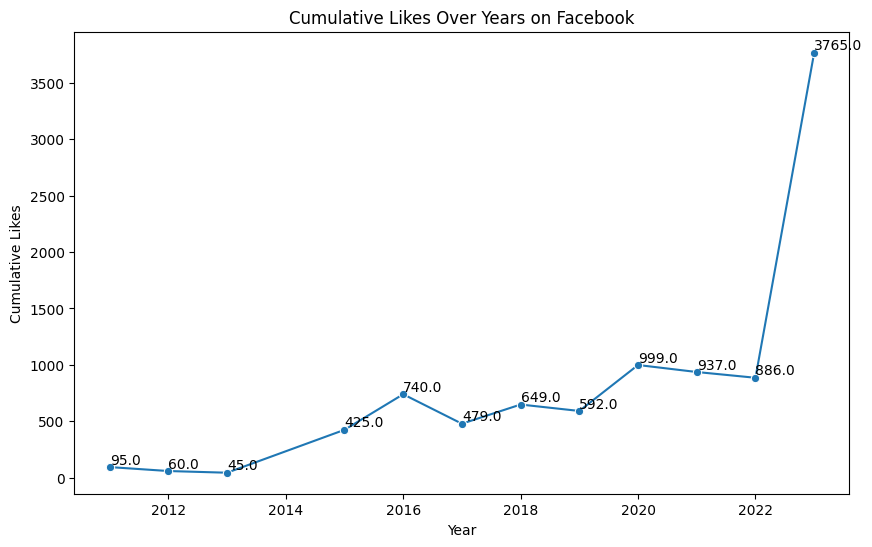

In [24]:
f = Facebook.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left',va='bottom')
    
plt.title('Cumulative Likes Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')
plt.show()

The `ha` and `va` parameters in the plt.text() function control the horizontal and vertical alignment of the text. Here's what each parameter means:

**`ha` stands for horizontal alignment:**

'left': Aligns the text to the left.

'center': Centers the text horizontally.

'right': Aligns the text to the right.

**`va` stands for vertical alignment:**

'top': Aligns the text to the top.

'center': Centers the text vertically.

'bottom': Aligns the text to the bottom.

'baseline': Aligns the text to the baseline.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


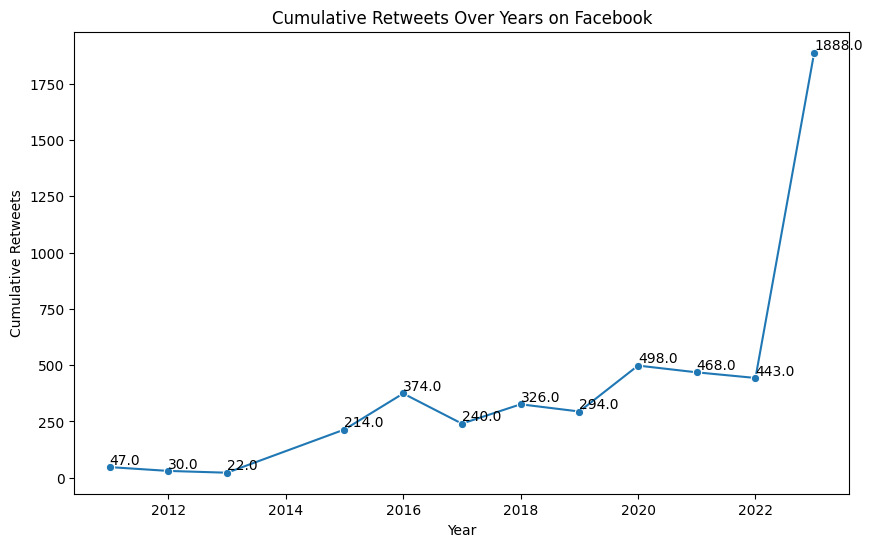

In [25]:
f = Facebook.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

# Twitter

**Top 10 hashtags retweeted**

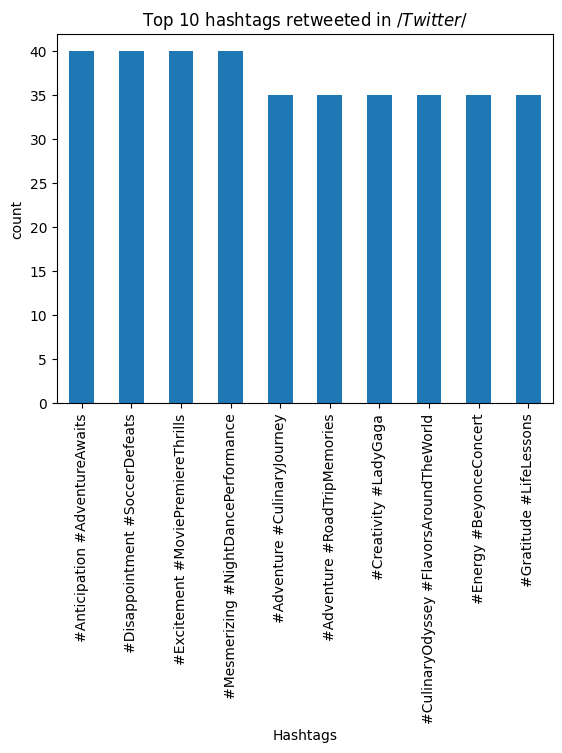

In [26]:
H_R_t = Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_t.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Twitter $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

**Question: Who User liked mostly?** 

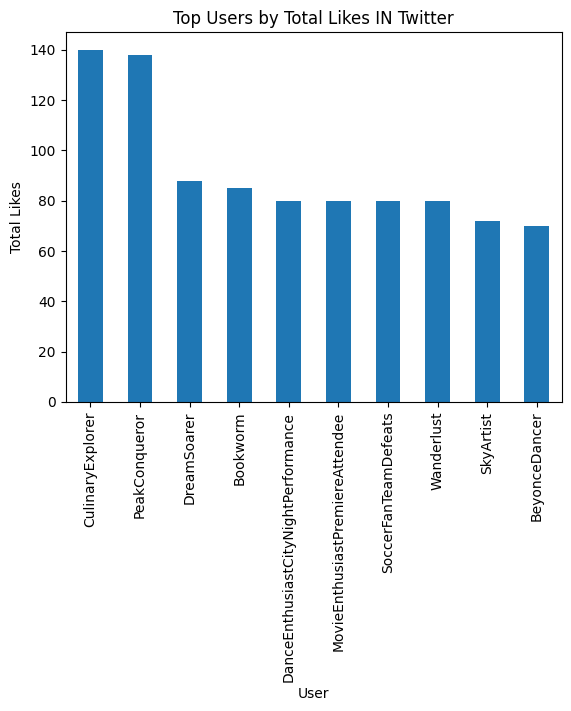

In [27]:
top_likes_platform_t = Twitter.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_t.plot(kind='bar')
plt.title('Top Users by Total Likes IN Twitter')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


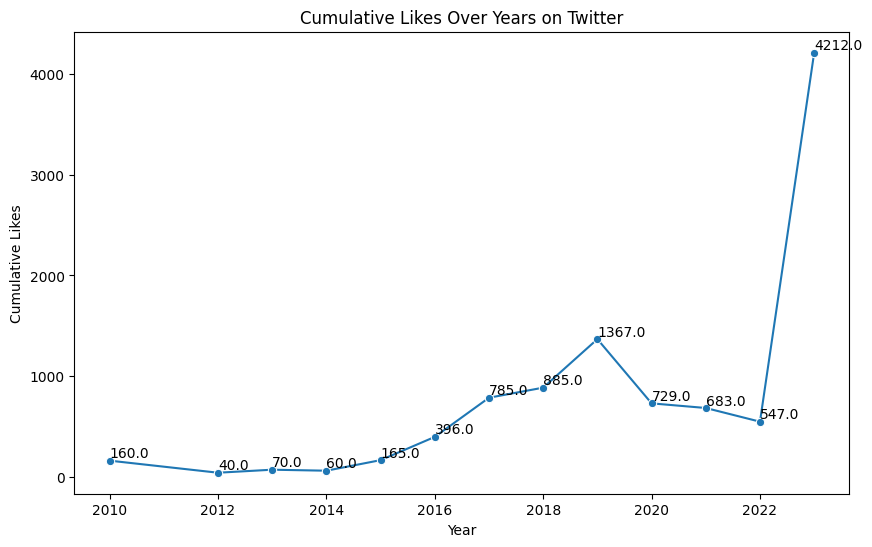

In [28]:
f = Twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')
    
plt.title('Cumulative Likes Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


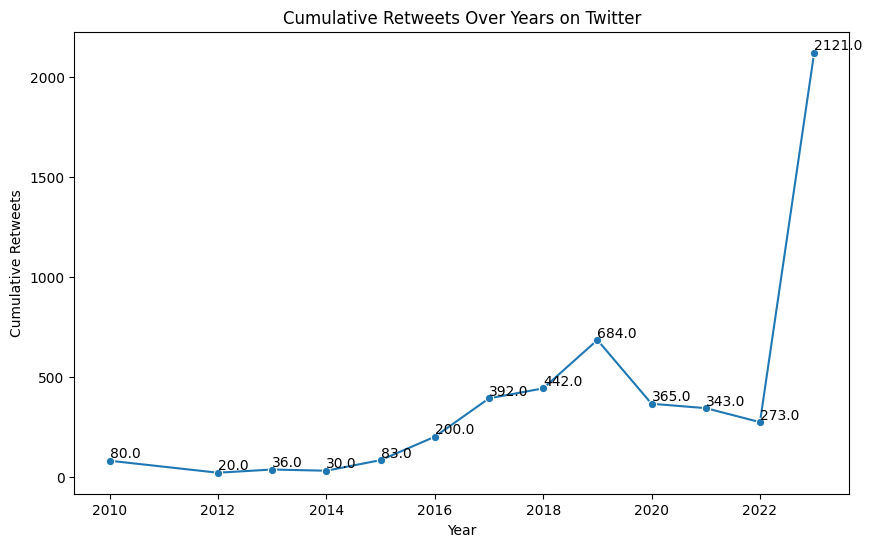

In [29]:
f = Twitter.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

# Instagram

**Top 10 hashtags retweeted**

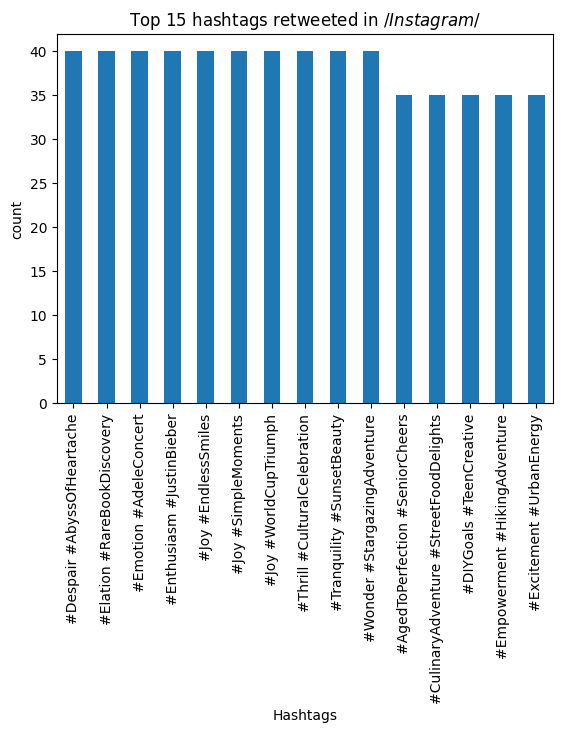

In [30]:
H_R_i = Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False)
H_R_i.plot(kind='bar')
plt.title('Top 15 hashtags retweeted in $/ Instagram $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

**Question: Who User liked mostly?**

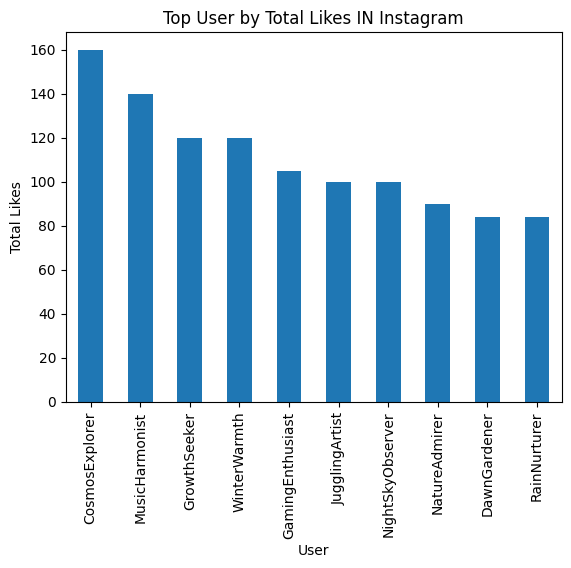

In [31]:
top_likes_platform_i = Instagram.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_i.plot(kind='bar')
plt.title('Top User by Total Likes IN Instagram')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


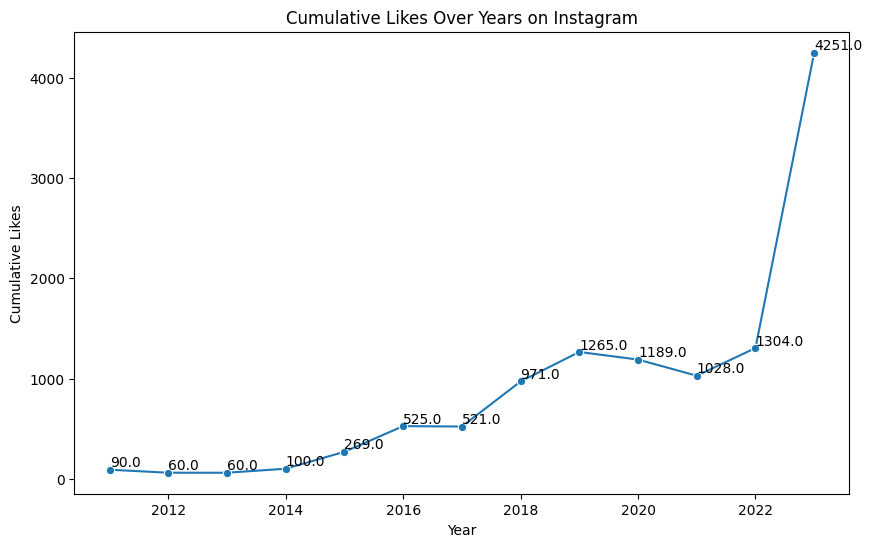

In [32]:
f = Instagram.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


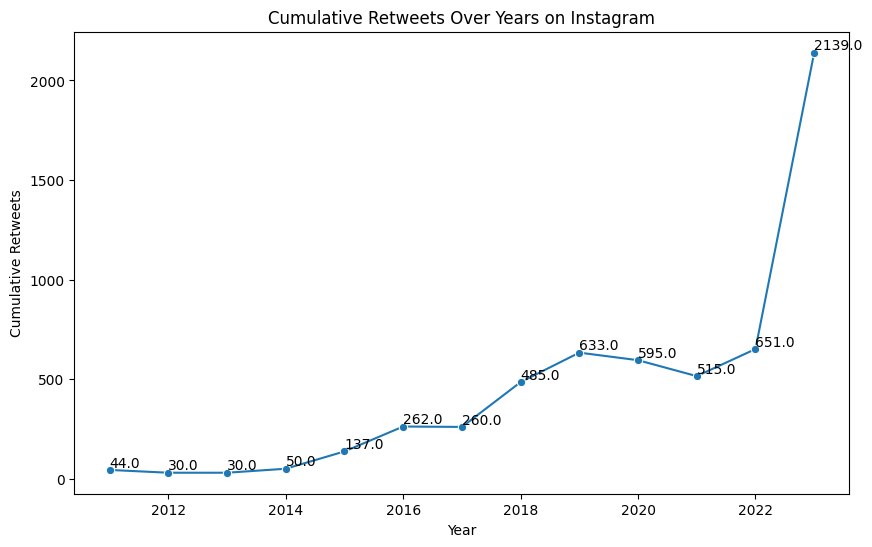

In [33]:
f = Instagram.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

**Credit:**

https://www.kaggle.com/code/yossefazam/social-media-sentiments-analysis/notebook